# Qinying Chen 
# Matthew Benvenuto
# Morgan Acevedo
# Mutasim Mim
# Wayne Nguyen

# Problem 1

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Generate random data
n = 100
p = 100

X = np.random.randn(n,p)
epsilon = np.random.rand(n,1)
beta = np.random.randn(p)
y = np.matmul(X, beta).reshape(100,1) +epsilon

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(75, 100)
(25, 1)
(75, 1)
(25, 1)


In [ ]:
'''
Majority of the computation is done in the function below.
Inputs:
X : n ×p matrix (predictors).
y : n ×1 vector (response variable).
K : integer (number of folds).
alphas: m ×1 vector of lasso parameters 

Outputs:
records each alpha, along with its average errors (from the K-Folds), standard deviation of the erros,
average scores, and the standard deviations of the scores. We then feed this output to the main general function later.
'''

'\nMajority of the computation is done in the function below.\nInputs:\nX : n ×p matrix (predictors).\ny : n ×1 vector (response variable).\nK : integer (number of folds).\nalphas: m ×1 vector of lasso parameters \n\nOutputs:\nrecords each alpha, along with its average errors (from the K-Folds), standard deviation of the erros,\naverage scores, and the standard deviations of the scores. We then feed this output to the main general function later.\n'

In [ ]:
# main function to collect data for alphas
def Average_Std_Alpha_for_Alphas(X,y, K, alphas):
  individual_data = []
  for alpha in alphas:
    kf = KFold(n_splits=K)
    clf = Lasso(alpha)
    scores_for_alpha = []
    errors_for_alpha = []
    for j, (train, test) in enumerate(kf.split(X)): # this is the K-Fold step
      X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
      clf.fit(X_train, y_train)
      nonzero_coords = []
      # the loop below collects the features that do not vanish by the lasso
      for i in range(p):
        if clf.coef_[i] != 0:
          nonzero_coords.append(i)
      if len(nonzero_coords) > 0: # if at least one non-zero coefficient remains
        X_new = pd.DataFrame(X_train).iloc[:, nonzero_coords]
        lin_model = LinearRegression(fit_intercept=True) # new linear model with the features
        # steps below are self-explanatory
        lin_model.fit(X_new, y_train)
        scores_for_alpha.append(lin_model.score(pd.DataFrame(X_test).iloc[:,nonzero_coords], y[test]))

        y_predicted = lin_model.predict(pd.DataFrame(X_test).iloc[:,nonzero_coords])
        error_for_fold = ((y_predicted-y_test)**2).sum()
        errors_for_alpha.append(error_for_fold)
    if len(scores_for_alpha) > 0: # collecting the data together
      avg_score_alpha = np.array(scores_for_alpha).mean()
      std_alpha = np.array(scores_for_alpha).std()
      avg_error_alpha = np.array(errors_for_alpha).sum()/len(y_test)
      std_alpha_error = np.array(errors_for_alpha).std()
      individual_data.append([alpha, avg_score_alpha, std_alpha, avg_error_alpha, std_alpha_error,])
  #print("individual data: ", individual_data)
  return individual_data #return one list with all the information

In [ ]:
# checking the functionality of the function
print(Average_Std_Alpha_for_Alphas(X,y, 10, np.arange(0.01, 1.0, 0.01)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+00, tolerance: 7.754e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[[0.01, -0.7741254836731282, 4.108854703707587, 861.2290874001283, 1827.5518580454943], [0.02, 0.42590571423959833, 0.45470376736247037, 332.16295788057903, 169.56112071687656], [0.03, 0.4668134105450895, 0.462307603400643, 310.6681558765194, 182.38166566336008], [0.04, 0.44858825526587004, 0.45813281430559466, 338.4353403082998, 186.3206726728441], [0.05, 0.39044683162533506, 0.44184997764556017, 380.90745588354724, 191.66700241496827], [0.060000000000000005, 0.365875330014244, 0.41912309238114215, 406.32865949517793, 181.56008195531572], [0.06999999999999999, 0.3371389172546236, 0.41924669718271534, 418.3850719902859, 184.53283240634804], [0.08, 0.33303125125970484, 0.42068199618333874, 419.35303593533354, 172.6087507983671], [0.09, 0.33794417260874715, 0.3702329603111697, 430.7401946155621, 153.3612946882577], [0.09999999999999999, 0.32739864942402, 0.43959680935147005, 438.39543386288386, 211.10154217126882], [0.11, 0.3579543109445974, 0.426126467430062, 422.41938039844945, 217.159

In [ ]:
def FindMaxAlpha_score_v(max_score, individual_data): # this data is coming in the form of the output of Average_Std_Alpha_for_Alphas
  # onesd for scores
  current_largest_alpha = -1
  for entry in individual_data:
    if max_score - entry[1] <= entry[2]: # criterion for passable alpha
      current_largest_alpha = max(current_largest_alpha, entry[0])
  return current_largest_alpha

In [ ]:
def FindMaxAlpha_error_v(min_error, data): # this data is coming in the form of the output of Average_Std_Alpha_for_Alphas
  # onesd for errors, the one we will be using
  current_largest_alpha = -1
  for entry in data:
    if entry[3] - min_error <= entry[4]: # criterion for passable alpha
      current_largest_alpha = max(current_largest_alpha, entry[0])
  return current_largest_alpha

In [ ]:
def FindMinAlpha_score_v(max_score, individual_data): # this data is coming in the form of the output of Average_Std_Alpha_for_Alphas
  # onesd for scores
  current_smallest_alpha = 10
  for entry in individual_data:
    if max_score - entry[1] <= entry[2]:
      current_smallest_alpha = min(current_smallest_alpha, entry[0])
  return current_smallest_alpha

In [ ]:
def FindMinAlpha_error_v(min_error, data): # this data is coming in the form of the output of Average_Std_Alpha_for_Alphas
  current_minimum_alpha = 10
  for entry in data:
    if entry[3] - min_error <= entry[4]:
      current_minimum_alpha = min(current_minimum_alpha, entry[0])
  return current_minimum_alpha

In [ ]:
# for the function below
'''
Description: This function calls Average_Std_Alpha_for_Alphas with the given inputs
and returns data with desired values (alpha, avg_score_alpha, std_alpha, avg_error_alpha, std_alpha_error).
Then, it iterates through the entries of the data and determines the average errors of the alphas and 
standard deviation (done in Average_Std_Alpha_for_Alphas). Furthermore, it determines the best alpha 
with the smallest error. Then, it determines the minimum error of all the errors in the data. Next, it calls 
FindMaxAlpha_error_v and FindMinAlpha_error_v to find the largest and smallest alpha one standard deviation
away from the best alpha. Finally, it returns. 

Inputs:
X : n ×p matrix (predictors).
y : n ×1 vector (response variable).
K : integer (number of folds).
alphas: m ×1 vector of lasso parameters .

Outputs:
cv_err: m ×1 vector containing the average cross-validation error for
each lasso parameter.
cv_std: m ×1 vector containing the standard deviation of the
cross-validation error for each lasso parameter.
best_alpha: the best lasso parameter selected based on the average
cross-validation error.
best_alpha_onesd_low, smallest lasso parameter selected using the one
standard deviation rule.
best_alpha_onesd_high, largest lasso parameter selected using the one
standard deviation rule
'''

'\nInputs:\nX : n ×p matrix (predictors).\ny : n ×1 vector (response variable).\nK : integer (number of folds).\nalphas: m ×1 vector of lasso parameters .\n\nOutputs:\ncv_err: m ×1 vector containing the average cross-validation error for\neach lasso parameter.\ncv_std: m ×1 vector containing the standard deviation of the\ncross-validation error for each lasso parameter.\nbest_alpha: the best lasso parameter selected based on the average\ncross-validation error.\nbest_alpha_onesd_low, smallest lasso parameter selected using the one\nstandard deviation rule.\nbest_alpha_onesd_high, largest lasso parameter selected using the one\nstandard deviation rule\n'

In [ ]:
### wrapper function to get the output in the desired format
def GeneralKFoldFunction(X,y,K,alphas):
  data = Average_Std_Alpha_for_Alphas(X,y,K,alphas)

  best_alpha = -1
  current_best_error = math.inf
  cv_err, cv_std, = [], []
  # cv_err and cv_std are the desired vectors
  for entry in data:
    cv_err.append(entry[3])
    cv_std.append(entry[4])
    if entry[3] < current_best_error:
      best_alpha = entry[0]
      current_best_error = entry[3]
  

  ### one std rules

  min_error = np.array([entry[3] for entry in data]).min()
  best_alpha_onesd_high = FindMaxAlpha_error_v(min_error, data)
  best_alpha_onesd_low = FindMinAlpha_error_v(min_error, data)

  return (cv_err, cv_std, best_alpha, best_alpha_onesd_high, best_alpha_onesd_low)


In [ ]:
## testing
GeneralKFoldFunction(X,y,10,np.arange(0.01, 1.0, 0.01))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+00, tolerance: 7.754e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


([861.2290874001283,
  332.16295788057903,
  310.6681558765194,
  338.4353403082998,
  380.90745588354724,
  406.32865949517793,
  418.3850719902859,
  419.35303593533354,
  430.7401946155621,
  438.39543386288386,
  422.41938039844945,
  418.016371892023,
  433.5417168381805,
  424.58005163493755,
  435.7459273587812,
  459.68647104468994,
  451.8902721712778,
  459.38493909115743,
  468.2462494815121,
  492.76085376269236,
  497.52316955967274,
  489.2807236727055,
  463.21737295260755,
  451.50763570492853,
  455.73453097568364,
  442.54454612768524,
  412.80505224696924,
  441.5182474483112,
  429.3902417293351,
  433.05906316395414,
  427.80146445429347,
  428.8772325756594,
  439.2975658823617,
  437.59768997439687,
  453.196982238013,
  448.71721232914706,
  433.4091788191093,
  430.7763914447238,
  431.2013950767873,
  434.3209928288412,
  415.39105492484396,
  410.1138019999038,
  392.9871561380448,
  393.1518990836961,
  397.11765662255664,
  379.1330620273962,
  376.19259317

# Problem 2


# Importing libraries, reading data, and creating the training and test sets etc.

In [ ]:
# first, we explore the data, and find the most important features, which will answer part (3) of the question. Then , we will work on the other parts.

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/assay.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = data.transpose()

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338
V1,-0.203735,-0.788446,0.656863,1.691702,-0.867305,-0.418590,-0.867305,-0.297948,1.579716,1.483176,...,1.564534,-0.867305,1.121943,0.273475,0.741543,-0.867305,-0.367299,1.071082,-0.867305,3.331854
V2,-0.155235,-0.830332,-0.158835,-0.830332,-0.830332,-0.830332,-0.830332,-0.830332,-0.525977,1.182259,...,0.629099,-0.830332,1.144187,0.524827,0.705412,-0.830332,-0.830332,0.715401,-0.830332,3.326836
V3,0.538864,-0.849001,0.660701,1.158440,-0.849001,-0.849001,-0.849001,-0.628460,0.056404,1.708672,...,1.624638,-0.849001,1.644931,0.763305,0.655540,-0.849001,-0.849001,1.112414,-0.849001,3.296083
V4,-0.251111,-0.820342,1.504918,1.951458,-0.820342,-0.820342,-0.820342,-0.796067,1.232556,1.530174,...,1.487803,-0.780274,2.936109,0.960004,1.170244,-0.492856,0.081868,0.229311,-0.820342,3.347525
V5,0.078418,-0.827824,0.838733,1.606317,-0.552761,-0.115548,-0.827824,-0.827824,0.934073,1.434136,...,2.215141,-0.827824,1.417002,0.479664,0.596428,-0.827824,-0.389245,-0.827824,-0.827824,3.321095


In [ ]:
data.shape

(49, 2339)

In [ ]:
responses = pd.read_csv('/content/pheno.csv')

In [ ]:
responses.iloc[34][0]

'positive'

In [ ]:
len(responses)

49

In [ ]:
## Converting the responses column to binary values
responses_temp = [0]*len(responses)
print(responses)
for i in range(len(responses)):
  if responses.iloc[i][0] == 'positive':
    responses_temp[i] = 1
responses = responses_temp

     nodal.y
0   negative
1   negative
2   negative
3   negative
4   negative
5   negative
6   positive
7   positive
8   positive
9   positive
10  positive
11  positive
12  negative
13  negative
14  negative
15  negative
16  negative
17  negative
18  negative
19  positive
20  positive
21  positive
22  positive
23  positive
24  positive
25  negative
26  positive
27  negative
28  negative
29  negative
30  negative
31  positive
32  positive
33  positive
34  positive
35  negative
36  negative
37  negative
38  positive
39  positive
40  positive
41  positive
42  positive
43  negative
44  negative
45  negative
46  positive
47  positive
48  negative


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, responses, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(36, 2339)

In [ ]:
X_test.shape

(13, 2339)

In [ ]:
len(y_train)

36

In [ ]:
len(y_test)

13

In [ ]:
## so 36 training samples and 13 test samples

In [ ]:
## replacing missing values with 0's
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[1]):
    if pd.isnull(X_train.iloc[i,j]):
      X_train.iloc[i,j] = 0.0
      print(i, ' ', j, X_train.iloc[i,j])

In [ ]:
coef_list = []
for alpha in np.arange(0.01, 1.0, 0.01):
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)
  coefs = lasso.coef_
  nonzero_coefs = []
  for i in range(len(coefs)):
    if coefs[i] != 0:
      nonzero_coefs.append([i,coefs[i]])
  coef_list.append([alpha, nonzero_coefs])

In [ ]:
coef_list

[[0.01,
  [[25, 0.054460292376621616],
   [78, 0.14247942672680122],
   [116, 0.10147123745521551],
   [131, 0.30698653823033556],
   [188, -0.024608312354537202],
   [454, -0.010183081480396126],
   [607, -0.05113484276338568],
   [664, -0.011143228356883977],
   [707, -0.10921030237863968],
   [797, 0.07809015055746314],
   [830, 0.0004958468744726582],
   [976, 0.026244781238190146],
   [981, 0.03079537720511986],
   [1033, 0.09751178790240583],
   [1234, 0.08644349404466331],
   [1259, 0.0311642774096037],
   [1518, 0.0017588452724413702],
   [1551, -0.090693667722613],
   [1554, -0.10576169495004044],
   [1620, -0.005137410230058515],
   [1637, -0.0025431540107028875],
   [1665, 0.07285774929981005],
   [1674, -0.05437098138944892],
   [1709, -0.0014160660998691194],
   [1721, -0.018763667422611253],
   [1932, 0.0868227781407575],
   [2027, 0.0021992456035994984],
   [2128, -0.0028055414178275815],
   [2151, -0.026857712860675512],
   [2253, -0.09396499514728136],
   [2330, 0.0472

In [ ]:
### alpha values seem to be too large, so we will use smaller values
coef_list = []
for alpha in np.arange(0.001, 0.25, 0.001):
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)
  coefs = lasso.coef_
  nonzero_coefs = []
  for i in range(len(coefs)):
    if coefs[i] != 0:
      nonzero_coefs.append([i,coefs[i]])
  coef_list.append([alpha, nonzero_coefs])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-03, tolerance: 8.972e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
coef_list

In [ ]:
## for each alpha, we print how many nonzero coefficinet are remaining
for entry in coef_list:
  print(entry[0], len(entry[1]))

0.001 38
0.002 37
0.003 36
0.004 35
0.005 34
0.006 32
0.007 31
0.008 30
0.009000000000000001 31
0.010000000000000002 31
0.011 28
0.012 28
0.013000000000000001 28
0.014000000000000002 29
0.015 29
0.016 29
0.017 28
0.018000000000000002 28
0.019000000000000003 27
0.02 27
0.021 26
0.022000000000000002 27
0.023 27
0.024 26
0.025 26
0.026000000000000002 26
0.027000000000000003 26
0.028 26
0.029 26
0.030000000000000002 25
0.031 25
0.032 25
0.033 24
0.034 24
0.035 24
0.036000000000000004 24
0.037000000000000005 23
0.038 24
0.039 23
0.04 23
0.041 23
0.042 23
0.043000000000000003 23
0.044000000000000004 22
0.045 21
0.046 20
0.047 19
0.048 19
0.049 18
0.05 18
0.051000000000000004 18
0.052000000000000005 18
0.053000000000000005 18
0.054 17
0.055 16
0.056 16
0.057 16
0.058 16
0.059000000000000004 16
0.060000000000000005 15
0.061 15
0.062 15
0.063 15
0.064 15
0.065 15
0.066 14
0.067 14
0.068 14
0.069 14
0.07 14
0.07100000000000001 14
0.07200000000000001 14
0.07300000000000001 13
0.074 12
0.075 12
0.

In [ ]:
## So, these alpha values seem to be better

In [ ]:
## Now, we record for particular alphas which features remain (nonzero coefficients)
coef_coords = []
for l in coef_list[1:]:
  coefs_ = []
  for ll in l[1:]:
    for lll in ll:
      if len(lll) > 0:
        coefs_.append(lll[0])
  coef_coords.append(coefs_)

In [ ]:
coef_coords

In [ ]:
### We now count the frequencies of the features appearing as nonzero coefficient for various alphas
coef_frequencies = {}

In [ ]:
for entry in coef_list:
  for pair in entry[1]:
    if pair[0] in coef_frequencies:
      coef_frequencies[pair[0]] += 1
    else:
      coef_frequencies[pair[0]] = 1

In [ ]:
coef_frequencies

{25: 45,
 78: 38,
 116: 149,
 131: 230,
 186: 5,
 188: 18,
 331: 3,
 454: 12,
 606: 6,
 607: 46,
 613: 1,
 664: 28,
 707: 36,
 796: 60,
 797: 48,
 830: 54,
 956: 4,
 976: 54,
 981: 65,
 1033: 53,
 1059: 82,
 1234: 155,
 1259: 99,
 1518: 11,
 1548: 9,
 1551: 32,
 1554: 23,
 1620: 131,
 1637: 10,
 1665: 86,
 1674: 73,
 1706: 2,
 1709: 10,
 1721: 108,
 1923: 2,
 1932: 89,
 1993: 82,
 2027: 39,
 2077: 1,
 2128: 10,
 2151: 20,
 2178: 5,
 2253: 44,
 2330: 174,
 2338: 72}

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x,y = [], []
for entry in coef_frequencies:
  x.append(entry)
  y.append(coef_frequencies[entry])

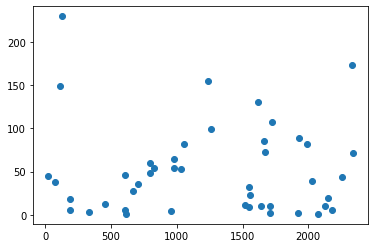

In [ ]:
plt.scatter(x,y)

In [ ]:
freqs = []
for a,b in zip(x,y):
  freqs.append([b,a])

In [ ]:
#freqs = freqs.sort(key= lambda z:z[0])

In [ ]:
## sorted list of frequencies and the features that appear that number of times
freqs = sorted(freqs)
for entry in freqs:
  print(entry)

[1, 613]
[1, 2077]
[2, 1706]
[2, 1923]
[3, 331]
[4, 956]
[5, 186]
[5, 2178]
[6, 606]
[9, 1548]
[10, 1637]
[10, 1709]
[10, 2128]
[11, 1518]
[12, 454]
[18, 188]
[20, 2151]
[23, 1554]
[28, 664]
[32, 1551]
[36, 707]
[38, 78]
[39, 2027]
[44, 2253]
[45, 25]
[46, 607]
[48, 797]
[53, 1033]
[54, 830]
[54, 976]
[60, 796]
[65, 981]
[72, 2338]
[73, 1674]
[82, 1059]
[82, 1993]
[86, 1665]
[89, 1932]
[99, 1259]
[108, 1721]
[131, 1620]
[149, 116]
[155, 1234]
[174, 2330]
[230, 131]


In [ ]:
len(freqs)

45

In [ ]:
## it seems that there ar 46 variables that are more important, and we have their coordinates as well

In [ ]:
## Here, the whole process will be on the current training set, and the test set will be 
## saved for part (4) of the question
def BestAlpha(X, y, K, alphas):
  individual_data = []
  for alpha in alphas:
    kf = KFold(n_splits=K)
    clf = Lasso(alpha)
    scores_for_alpha = []
    total_error = 0
    for j, (train, test) in enumerate(kf.split(X)):
      #X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
      clf.fit(X_train, y_train)
      nonzero_coords = []
      #print(clf.coef_)
      for i in range(X_train.shape[1]):
        if clf.coef_[i] != 0:
          nonzero_coords.append(i)
      #print(alpha)
      X_new = pd.DataFrame(X_train).iloc[:, nonzero_coords]
      lin_model = LinearRegression(fit_intercept=True)
      try:
        lin_model.fit(X_new, y_train)
        err = ((lin_model.predict(X_test.iloc[:, nonzero_coords])-y_test)**2).sum()
        total_error += err
        scores_for_alpha.append(lin_model.score(pd.DataFrame(X_test).iloc[:,nonzero_coords], y_test))
      except:
        continue
      #return (X_new, y_train, lin_model)
      #break
      #print('######### 1')
      
      
    #print('this alphs is good')
    if len(scores_for_alpha) > 0:
      scores_for_alpha = np.array(scores_for_alpha)
      score_for_alpha = scores_for_alpha.mean()
      individual_data.append([alpha, float(score_for_alpha), float(total_error)/len(X_test)])


      
  
  #print("individual data: ", individual_data)
  return individual_data

In [ ]:
C = BestAlpha(X_train, y_train, 10, [0.1,0.2])

In [ ]:
#just checking if C works as intended
C

[[0.1, 0.31901827096328006, 1.6117910746431245],
 [0.2, 0.635363080780869, 0.8630459626488309]]

In [ ]:
# we checked for good alphas previously, and going to use them here now
A = BestAlpha(X_train, y_train, 10, np.arange(0.01, 0.22, 0.001))

In [ ]:
A[:5]

[[0.01, 0.11624345911863165, 2.091731457707381],
 [0.011, 0.5412064398001182, 1.0859019176328564],
 [0.011999999999999999, 0.508666309069687, 1.1629199785332853],
 [0.012999999999999998, 0.4729389617046625, 1.2474817474445863],
 [0.013999999999999997, 0.41326041737614505, 1.3887327399381184]]

In [ ]:
## saving the values for future use
f = open('data.txt', 'w')
f.write(str(A))

8633

In [ ]:
x, y, z = [], [], []
for entry in A:
  x.append(entry[0])
  y.append(entry[2])
  z.append(entry[1])
y = np.array(y)
z = np.array(z)

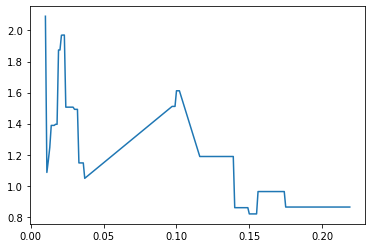

In [ ]:
# alpha vs average error graph
plt.plot(x,y)

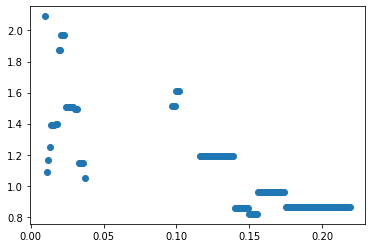

In [ ]:
plt.scatter(x,y)

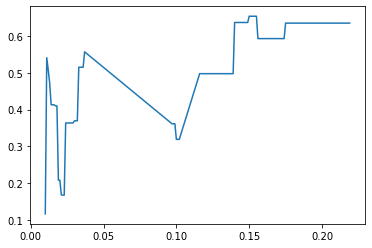

In [ ]:
# alpha - scores graph
plt.plot(x,z)

In [ ]:
max(z)

0.6540691426487267

In [ ]:
# collecting the alphas for which max score is achieved
good_coords = []
for i in range(len(z)):
  if z[i] == max(z):
    good_coords.append(i)

good_alphas = []
for i in good_coords:
  good_alphas.append(x[i])

In [ ]:
# the good alphas
good_alphas

[0.14999999999999988,
 0.15099999999999988,
 0.15199999999999989,
 0.15299999999999989,
 0.1539999999999999,
 0.1549999999999999]

In [ ]:
### for each alpha, which features are kept?
def LassoCoords(alphas):
  lasso_coords = []
  for alpha in alphas:
    nonzero_coords = []
    clf = Lasso(alpha)
    clf.fit(X_train, y_train)
    nonzero_coords = []
    for i in range(X_train.shape[1]):
      if clf.coef_[i] != 0:
          nonzero_coords.append(i)
    lasso_coords.append([alpha,nonzero_coords])

  return lasso_coords

In [ ]:
B = LassoCoords(good_alphas)

In [ ]:
# which features are not deleted by these good alphas?
B

[[0.14999999999999988, [131, 1234, 2330]],
 [0.15099999999999988, [131, 1234, 2330]],
 [0.15199999999999989, [131, 1234, 2330]],
 [0.15299999999999989, [131, 1234, 2330]],
 [0.1539999999999999, [131, 1234, 2330]],
 [0.1549999999999999, [131, 1234, 2330]]]

In [ ]:
# so, features 131, 1234, 2330 seems important


In [ ]:
### errors for these good alphas
errors = []
for entry in A:
  if entry[0] in good_alphas:
    #print(entry[0])
    errors.append([entry[0], entry[2]])

In [ ]:
errors

[[0.14999999999999988, 0.8187712600030135],
 [0.15099999999999988, 0.8187712600030135],
 [0.15199999999999989, 0.8187712600030135],
 [0.15299999999999989, 0.8187712600030135],
 [0.1539999999999999, 0.8187712600030135],
 [0.1549999999999999, 0.8187712600030135]]

In [ ]:
## using these features to create a model and compute the prediction error on the test set

In [ ]:
X_test.shape

(25, 100)

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
X_new = pd.DataFrame(X_train).iloc[:, [131, 1234, 2330]]
lin_model.fit(X_new, y_train)
err = ((lin_model.predict(X_test.iloc[:, [131, 1234, 2330]])-y_test)**2).sum()
print(err)

1.0644026380039175


In [ ]:
# running for randomly generated data
####
####

In [ ]:
n = 100
p = 100

X = np.random.randn(n,p)
epsilon = np.random.randn(n,1)
beta = np.zeros((p,1))
beta[0:8] = 10*np.random.rand(8,1)
y = X.dot(beta) + epsilon

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = pd.DataFrame(X_train), pd.DataFrame(X_test), pd.DataFrame(y_train), pd.DataFrame(y_test)

In [ ]:
y_test

,0
0,9.968003
1,11.466678
2,-9.885072
3,-16.361037
4,7.613414
5,3.880765
6,-11.475552
7,3.428663
8,10.474472
9,-5.390059


In [ ]:
# We call BestAlpha with range [0.0,1.0] with step 0.01 so that N = 100
C = BestAlpha(X,y,10, np.arange(0.0,1.0,0.01))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

In [ ]:
C[:4]

[[0.0, 0.6383811974905413, 515.9615964023737],
 [0.01, 0.9681101035691141, 45.50084718328735],
 [0.02, 0.960250080175212, 56.715613091295374],
 [0.03, 0.9534581143958055, 66.40646290865571]]

In [ ]:
x, y, z = [], [], []
for entry in C:
  x.append(entry[0])
  y.append(entry[2])
  z.append(entry[1])
y = np.array(y)
z = np.array(z)

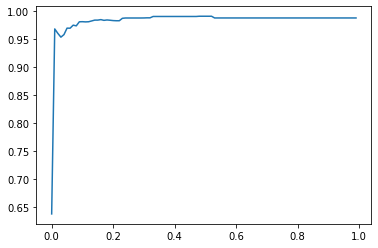

In [ ]:
plt.plot(x,z)

In [ ]:
good_coords = []
for i in range(len(z)):
  if z[i] == max(z):
    good_coords.append(i)

good_alphas = []
for i in good_coords:
  good_alphas.append(x[i])

In [ ]:
good_alphas

[0.48, 0.49, 0.5, 0.51, 0.52]

In [ ]:
D = LassoCoords(good_alphas)

In [ ]:
D

[[0.48, [0, 1, 3, 4, 5, 6, 7]],
 [0.49, [0, 1, 3, 4, 5, 6, 7]],
 [0.5, [0, 1, 3, 4, 5, 6, 7]],
 [0.51, [0, 1, 3, 4, 5, 6, 7]],
 [0.52, [0, 1, 3, 4, 5, 6, 7]]]

In [ ]:
### errors for these good alphas
errors = []
for entry in C:
  if entry[0] in good_alphas:
    #print(entry[0])
    errors.append([entry[0], entry[2]])

In [ ]:
errors

[[0.48, 13.233332295706193],
 [0.49, 13.233332295706193],
 [0.5, 13.233332295706193],
 [0.51, 13.233332295706193],
 [0.52, 13.233332295706193]]

In [ ]:
## using these features to create a model and compute the prediction error on the test set
lin_model = LinearRegression(fit_intercept=True)
X_new = pd.DataFrame(X_train).iloc[:, [0, 1, 3, 4, 5, 6, 7]]
lin_model.fit(X_new, y_train)
err = ((lin_model.predict(X_test.iloc[:, [0, 1, 3, 4, 5, 6, 7]])-y_test)**2).sum()/len(y_test)
st = ((lin_model.predict(X_test.iloc[:, [0, 1, 3, 4, 5, 6, 7]])-y_test)**2).std()
print(float(err))
print(float(st))

1.3233332295706197
2.087044109452927
